#**Project-1 Airbnb Booking Analysis (Host - Guest Matching)**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
Explore and analyze the data to discover key understandings such as :

1.Are private rooms preferred over other
room types ?

2.Is Manhattan neighbourhood more preferred over other neighbourhood ?

3.What were you able to leran from the analysis?

4.Did your assumptions turn out to be right?

5.How would your analysis be helpful to the stakeholders?

✅INITIAL SETTINGS AND LOADING OF DATA OF airbnb:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

✅LOADING DATA FROM THE OFFLINE FILES

In [ ]:
a = pd.read_csv('/content/Airbnb NYC 2019.csv')

✅INSPECTING OF DATA

In [ ]:
a.shape

(48895, 16)

In [ ]:
a.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
a.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

✅IMPORTANT INSIGHTS FROM DATA

The total number of rows and columns are 48895 and 16 .
There are null values and missing data we need to clean those .

✅FINDING OUT NULL VALUES

In [ ]:
a.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

✅OBSERVATION FROM THE DATA

1)Columns like name ,host_name ,last_review and review_per_month have missing values .

2)Columns like id ,name and last_reviews are not important , therefore we can drop these columns.

3)last_review and reviews_per_month columns have NaN and they are connected ,hence when the date is missing in last_review the values in review_per_month is also missing .

✅LETS DROP THE COLUMN name, id and last_review

In [ ]:
a.drop(["id","name","last_review"], axis=1, inplace=True)

In [ ]:
a.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
#replace the null values in reviews per month with zero
a.reviews_per_month.fillna(0, inplace=True)

In [ ]:
#after cleaning
a.isnull().sum()

host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
#type of rooms in this data
number_of_room_type = a['room_type'].unique()
number_of_room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
#number of locations
number_of_place=a["neighbourhood_group"].unique()
number_of_place

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

#1.Are private rooms preferred over other room types ?

         room_type  count
0  Entire home/apt  25409
1     Private room  22326
2      Shared room   1160


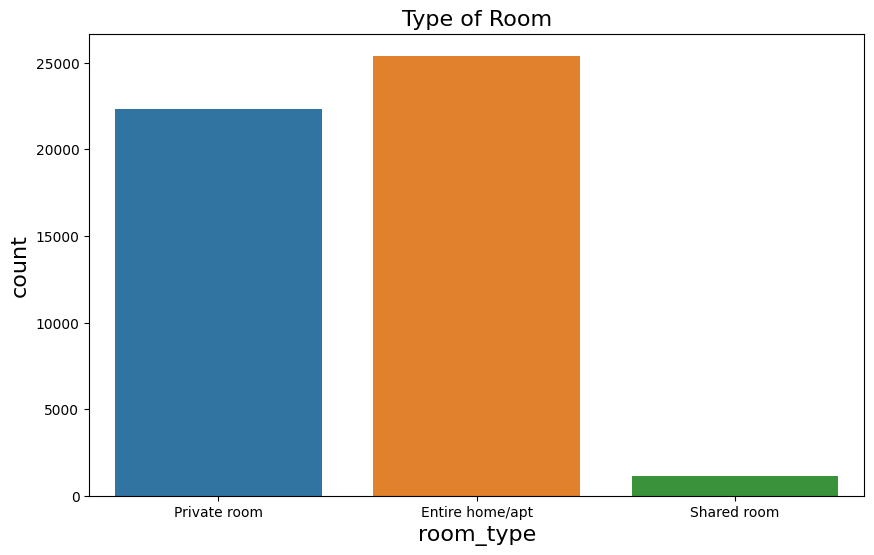

In [ ]:
room_type_counts = a['room_type'].value_counts().reset_index()
room_type_counts.columns = ['room_type', 'count']

# Print the DataFrame
print(room_type_counts)
#types of room
plt.figure(figsize=(10,6))
plt.title("Type of Room",fontsize = 16)
sns.countplot(data=a,x='room_type')
plt.xlabel("room_type",fontsize=16)
plt.ylabel("count",fontsize=16)
plt.show()

# **We can see that the Entire Home/Apartment has the highest share, followed by the Private Room, and the least preferred is Shared Room.**

#Room Type on Neighbourhood Group

   neighbourhood_group        room_type  total_room
0                Bronx  Entire home/apt         379
1                Bronx     Private room         652
2                Bronx      Shared room          60
3             Brooklyn  Entire home/apt        9559
4             Brooklyn     Private room       10132
5             Brooklyn      Shared room         413
6            Manhattan  Entire home/apt       13199
7            Manhattan     Private room        7982
8            Manhattan      Shared room         480
9               Queens  Entire home/apt        2096
10              Queens     Private room        3372
11              Queens      Shared room         198
12       Staten Island  Entire home/apt         176
13       Staten Island     Private room         188
14       Staten Island      Shared room           9


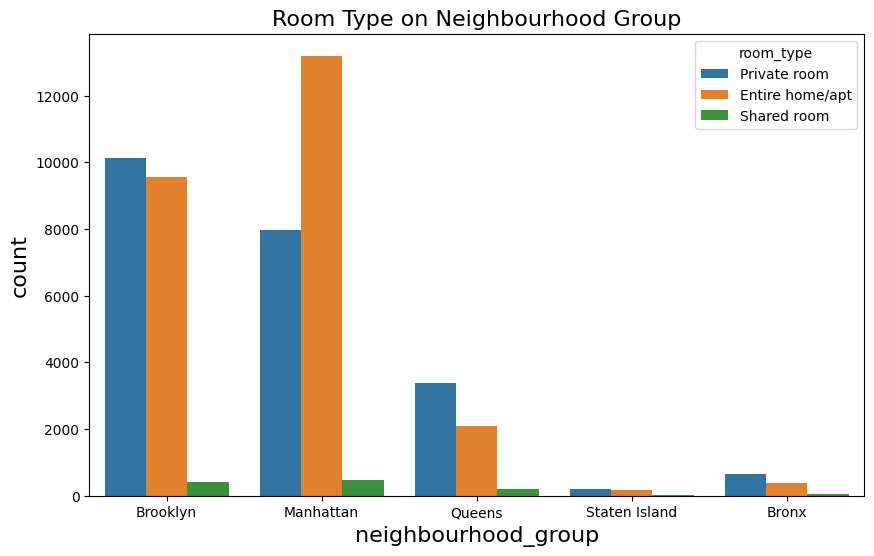

In [ ]:
total_room_by_location= a.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name="total_room")
print(total_room_by_location)
#rooms type per location
plt.figure(figsize=(10,6))
plt.title("Room Type on Neighbourhood Group",fontsize=16)
sns.countplot(data=a,x='neighbourhood_group',hue=a.room_type)
plt.xlabel("neighbourhood_group",fontsize=16)
plt.ylabel("count",fontsize=16)
plt.show()

# **The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal**

#**From above bar graph we say that when we talk about the peoples preference with respect to the Neighbourhood group private room are most likely choosen by the guest except Manhattan.**

#2.Is Manhattan neighbourhood more preferred over other neighbourhood ?

In [ ]:
total_hotels_by_location = a['neighbourhood_group'].value_counts().reset_index()
total_hotels_by_location.columns = ['neighbourhood_group', 'count']
print(total_hotels_by_location)

  neighbourhood_group  count
0           Manhattan  21661
1            Brooklyn  20104
2              Queens   5666
3               Bronx   1091
4       Staten Island    373


In [ ]:
#Bar chart
fig = px.bar(total_hotels_by_location, x='count', y='neighbourhood_group', orientation='h',
             labels={'count': 'Count', 'neighbourhood_group': 'Neighbourhood Group'},
             title='Total Hotels on Location',
             template='plotly_white',
             color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

# Pie chart
neighbourhood_group_distribution = a['neighbourhood_group'].value_counts().reset_index()
neighbourhood_group_distribution.columns = ['neighbourhood_group', 'count']
fig = px.pie(neighbourhood_group_distribution, values='count', names='neighbourhood_group',
             title='Neighbourhood Group Distribution',
             template='plotly_white')
# Display the plot
fig.show()

 # **The pie and bar chart above shows that Manhattan neighbourhood more preferred over other neighbourhood.**

#The average price of an Airbnb listing

In [ ]:
average_price = a['price'].mean()
print("The average price of an Airbnb listing in NYC per night is: ${:.2f}".format(average_price))

The average price of an Airbnb listing in NYC per night is: $152.72


# **The average price of an Airbnb listing in NYC is $150 per night.**

# Average price by Room Type in Airbnb NYC.




In [ ]:
# Convert price column to numeric
a['price'] = a['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate average price by room type
average_price_by_room_type = a.groupby('room_type')['price'].mean()
print(average_price_by_room_type)



room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


In [ ]:
# Calculate average price by room type
average_price_by_room_type = a.groupby('room_type')['price'].mean().reset_index()

# Create a line chart using Plotly
fig = px.line(average_price_by_room_type, x='room_type', y='price',
              labels={'room_type': 'Room Type', 'price': 'Average Price'},
              title='Average Price by Room Type in Airbnb NYC')
# Customizing the appearance of the line chart
fig.update_traces(line_color='blue', marker_color='blue', marker_size=8)
# Show the plot
fig.show()

# **The above bar graph shows the avarage price of each room type**

#Average price per Neighbourhood group

In [ ]:
average_price_per_group = a.groupby('neighbourhood_group')['price'].mean().reset_index(name='average_price')

print(average_price_per_group)

  neighbourhood_group  average_price
0               Bronx      87.496792
1            Brooklyn     124.383207
2           Manhattan     196.875814
3              Queens      99.517649
4       Staten Island     114.812332


In [ ]:
fig = px.bar(average_price_per_group, x='neighbourhood_group', y='average_price',
             labels={'neighbourhood_group': 'Neighbourhood Group', 'average_price': 'Average Price'},
             title='Average Price per Neighbourhood Group in NYC',
             color_discrete_sequence=['skyblue'],  # Use 'skyblue' as the bar color
             template='plotly_white')
fig.show()

# 1-We can say that the Manhattan has the highest price range for the listings,followed by Brooklyn

# 2-Queens and Staten Island seem to have a very similar distribution,

# 3-The Bronx is the cheapest.

#Correlation between Number of Listings and Listing Price

Correlation coefficient between number of listings and price: -0.00336767172003548


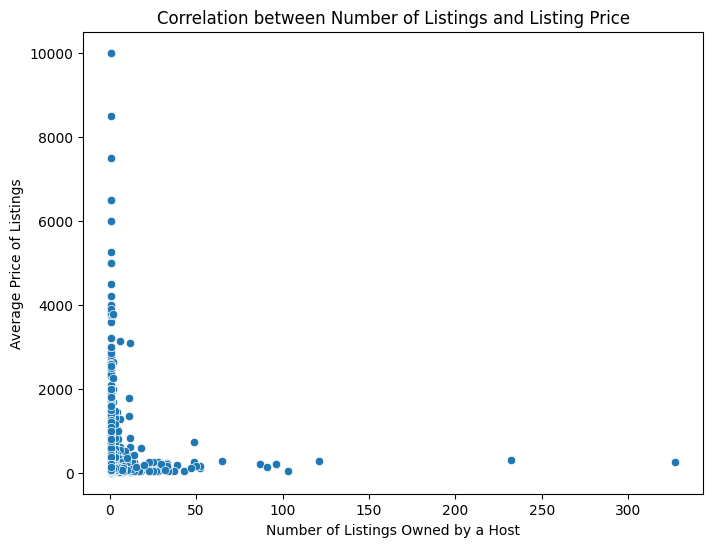

In [ ]:
host_listings_count = a.groupby('host_id')['price'].count()
correlation = host_listings_count.corr(a.groupby('host_id')['price'].mean())
print("Correlation coefficient between number of listings and price:", correlation)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=host_listings_count, y=a.groupby('host_id')['price'].mean())
plt.xlabel('Number of Listings Owned by a Host')
plt.ylabel('Average Price of Listings')
plt.title('Correlation between Number of Listings and Listing Price')
plt.show()

#Hosts Operating as Businesses

In [ ]:
grouped_data = a.groupby(['host_name', 'neighbourhood_group']).size().reset_index(name='property_count')
hosts_with_multiple_properties = grouped_data[grouped_data['property_count'] > 1]
threshold = 5
hosts_operating_as_businesses = hosts_with_multiple_properties.groupby('host_name').filter(lambda x: len(x) >= threshold)
# Output the results
print("Hosts operating as businesses :")
print(hosts_operating_as_businesses[['host_name', 'neighbourhood_group', 'property_count']])
fig = px.bar(hosts_operating_as_businesses, x='host_name', y='property_count',
             labels={'host_name': 'Host Name', 'property_count': 'Number of Properties'},
             title='Hosts Operating as Businesses',
             template='plotly_white')
fig.show()

Hosts operating as businesses :
      host_name neighbourhood_group  property_count
430        Alex               Bronx               4
431        Alex            Brooklyn             122
432        Alex           Manhattan             134
433        Alex              Queens              16
434        Alex       Staten Island               3
3248      David               Bronx               4
3249      David            Brooklyn             142
3250      David           Manhattan             202
3251      David              Queens              50
3252      David       Staten Island               5
6438       Jeff               Bronx               3
6439       Jeff            Brooklyn              17
6440       Jeff           Manhattan              33
6441       Jeff              Queens              10
6442       Jeff       Staten Island               2
6806       John               Bronx               3
6807       John            Brooklyn             104
6808       John           Manhat

# From above graph we say that Michael is a person who is doing these business very seriously as he had property on all the the groups and It also tell us that majority of Airbnb hosts in NYC are individuals, not businesses

#Neighborhood Distribution of Top Hosts

In [ ]:
grouped_data = a.groupby(['host_name', 'neighbourhood_group']).size().reset_index(name='property_count')
hosts_with_most_properties = grouped_data.loc[grouped_data.groupby('neighbourhood_group')['property_count'].idxmax()]
print("Hosts with the most number of properties in each neighborhood:")
print(hosts_with_most_properties[[ 'host_name', 'neighbourhood_group', 'property_count']])
top_hosts = hosts_with_most_properties['host_name'].tolist()
top_hosts_data = a[a['host_name'].isin(top_hosts)]

# Visual
fig1 = px.bar(hosts_with_most_properties, x='property_count', y='neighbourhood_group', color='host_name',
              orientation='h', barmode='group', text='property_count',
              labels={'property_count': 'Property Count', 'neighbourhood_group': 'Neighbourhood Group', 'host_name': 'Host Name'},
              title='Hosts with the Most Number of Properties in Each Neighborhood',
              template='plotly_white')
fig1.show()




Hosts with the most number of properties in each neighborhood:
          host_name neighbourhood_group  property_count
14435           Vie               Bronx              13
9741        Michael            Brooklyn             159
13217  Sonder (NYC)           Manhattan             327
7480         Kazuya              Queens              79
9118          Maria       Staten Island               9


# From above graph we see that host whose is name Sonder(NYC) has the most number of properties in Manhattan i.e.He is making a serious money because we know that Manhattan has high avarage price than other group.

#Location vise total availability

  neighbourhood_group  availability_365
0               Bronx            180843
1            Brooklyn           2015070
2           Manhattan           2425586
3              Queens            818464
4       Staten Island             74480


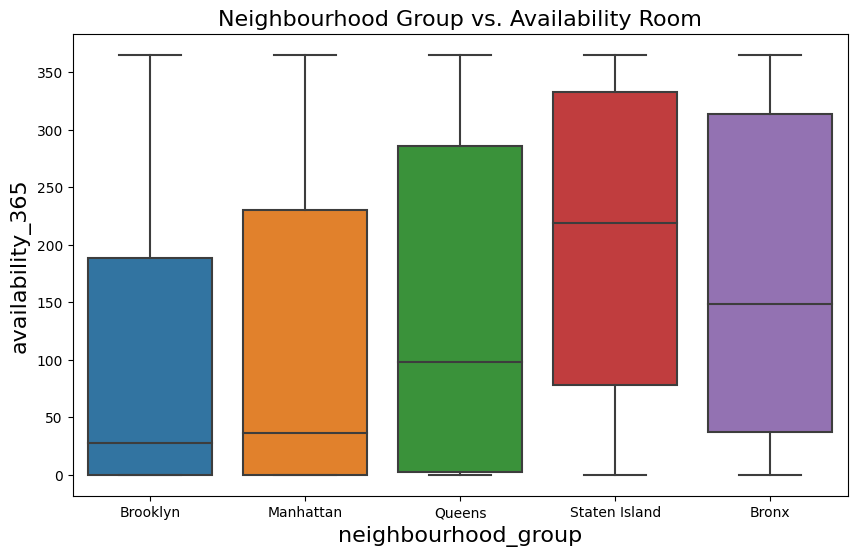

In [ ]:
#location vise total availability
average_availability= a.groupby(['neighbourhood_group'])['availability_365'].sum().reset_index()
print(average_availability)
#availability per year
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Group vs. Availability Room",fontsize=16)
sns.boxplot(data=a, x='neighbourhood_group',y='availability_365')
plt.xlabel('neighbourhood_group',fontsize=16)
plt.ylabel("availability_365",fontsize=16)
plt.show()

# **The above box plot shows the relationship between the availability room and neighborhood group.**

# Locations : Just Extra Insights

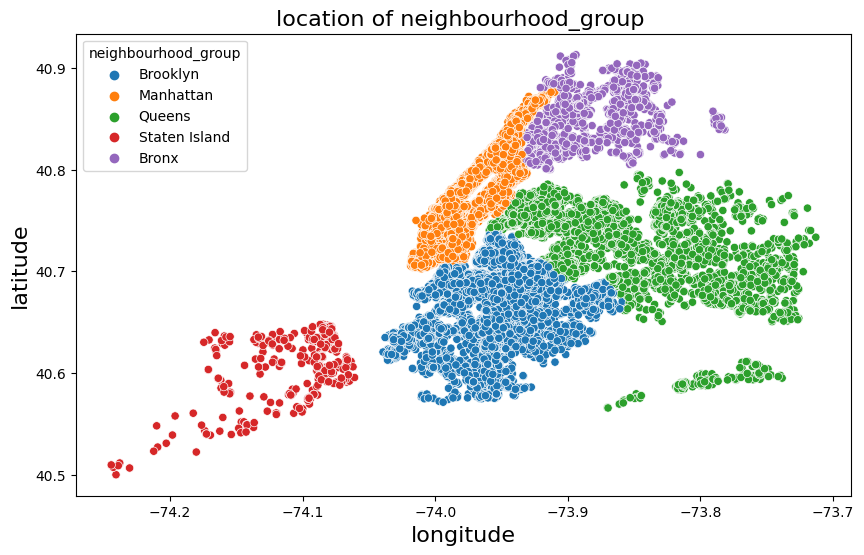

In [ ]:
#locations
plt.figure(figsize=(10,6))
sns.scatterplot(x=a.longitude,y=a.latitude,hue=a.neighbourhood_group)
plt.xlabel("longitude",fontsize=16)
plt.ylabel("latitude",fontsize=16)
plt.title("location of neighbourhood_group ",fontsize=16)
plt.show()

# **Above scatterplot shows that the hotels listed by location and say that though Queens is large by area but it is less popular as compared to Manhattan and Brooklyn.**

<Figure size 1000x800 with 0 Axes>

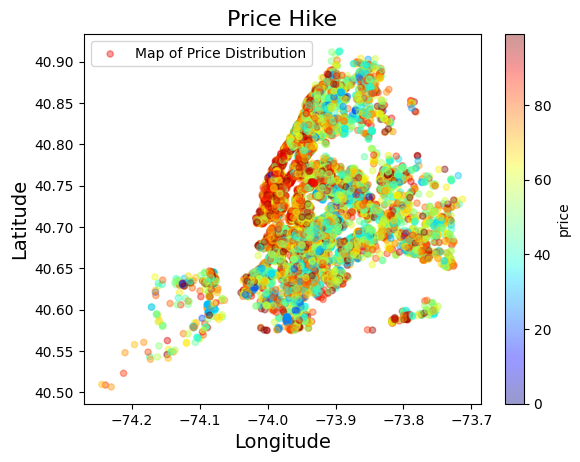

In [ ]:
plt.figure(figsize=(10, 8))
a[a['price'] < 100].plot(kind='scatter', x='longitude', y='latitude', label='Map of Price Distribution', c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4)
plt.title('Price Hike', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()


# **The information we got from the graph above is red color dots are the rooms with a higher price. Also, we can see that the Manhattan region has a more expensive room price.**

#Number of reviews for each location

  neighbourhood_group  number_of_reviews
0               Bronx              28371
1            Brooklyn             486574
2           Manhattan             454569
3              Queens             156950
4       Staten Island              11541


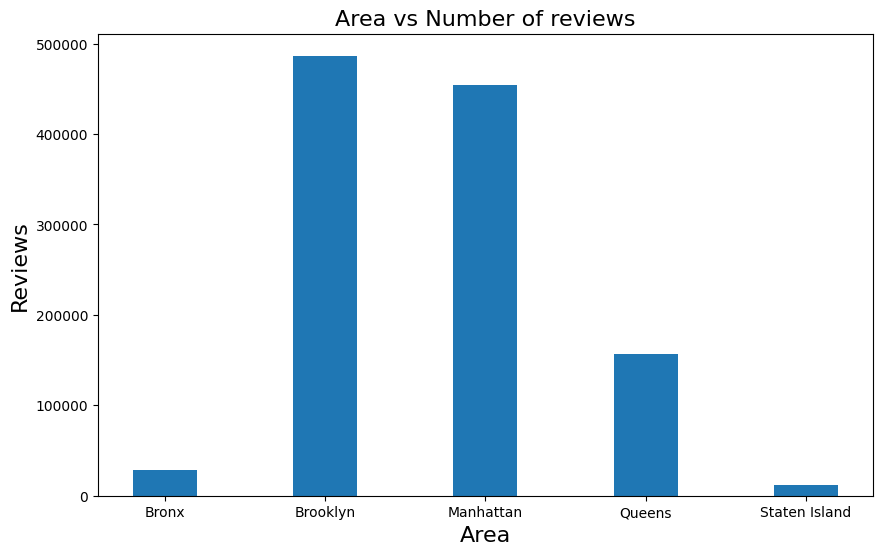

In [ ]:

location_reviews = a.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index()
print(location_reviews)
#number of reviews per area
area = location_reviews['neighbourhood_group']
review = location_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 6))
plt.bar(area,review, width = 0.4)
plt.title("Area vs Number of reviews",fontsize=16)
plt.xlabel("Area",fontsize=16)
plt.ylabel("Reviews",fontsize=16)
plt.show()

# Above bar plot shows that the brooklyn has a most number of reviews followed by manhattan , least reviews on staten island

# Overall price preditions with the help of reviews

       price  number_of_reviews
0        0.0                 95
1       10.0                 93
2       11.0                113
3       12.0                  8
4       13.0                  9
..       ...                ...
669   7703.0                  0
670   8000.0                  1
671   8500.0                  2
672   9999.0                  6
673  10000.0                  5

[674 rows x 2 columns]


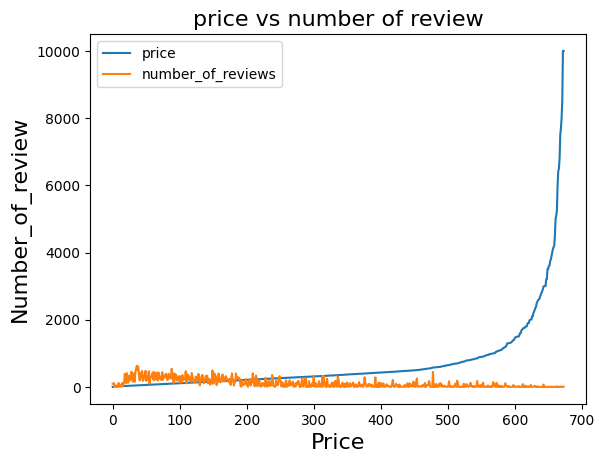

In [ ]:
#price preditions with the help of reviews
price_area = a.groupby(['price'])['number_of_reviews'].max().reset_index()
print(price_area)
#prices and review relation
price_area.plot()
plt.title('price vs number of review',fontsize = 16)
plt.xlabel("Price",fontsize = 16)
plt.ylabel("Number_of_review",fontsize = 16)
plt.show()

# From the above Analysis we see at start where price is low people are giving lot of reviews i.e. they enjoy the all services in low budget also.

#Anova Test for checking the whether price is some what related to the number of reviews or not



In [ ]:
import pandas as pd
import scipy.stats as stats
result = stats.f_oneway(*[group['price'] for name, group in a.groupby('neighbourhood_group')])

# Extract results
f_statistic, p_value = result.statistic, result.pvalue

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Check if the p-value is less than the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant relationship between neighbourhood_group and price.")
else:
    print("Fail to reject null hypothesis: There is no significant relationship between neighbourhood_group and price.")


F-statistic: 354.99483938396367
p-value: 7.723724235004603e-302
Reject null hypothesis: There is a significant relationship between neighbourhood_group and price.


This means that the prices of properties or goods vary significantly across the different neighborhood groups.

# Comparison of price and number of reviews w.r.t neighbourhood_group

In [ ]:
columns_to_compare = ['price', 'neighbourhood_group', 'number_of_reviews']
fig = px.scatter_matrix(a[columns_to_compare])

# Show the plot
fig.show()

#This Pairplot also says that where the price is less and service offered by the host is good there are lot of people willing to give an reviews for that area and may they also revisiting the same place.

#Top five busiest hosts

      host_name   host_id     room_type  number_of_reviews
10279      Dona  47621202  Private room                629
17708        Jj   4734398  Private room                607
25566      Maya  37312959  Private room                543
6235      Carol   2369681  Private room                540
8947   Danielle  26432133  Private room                510


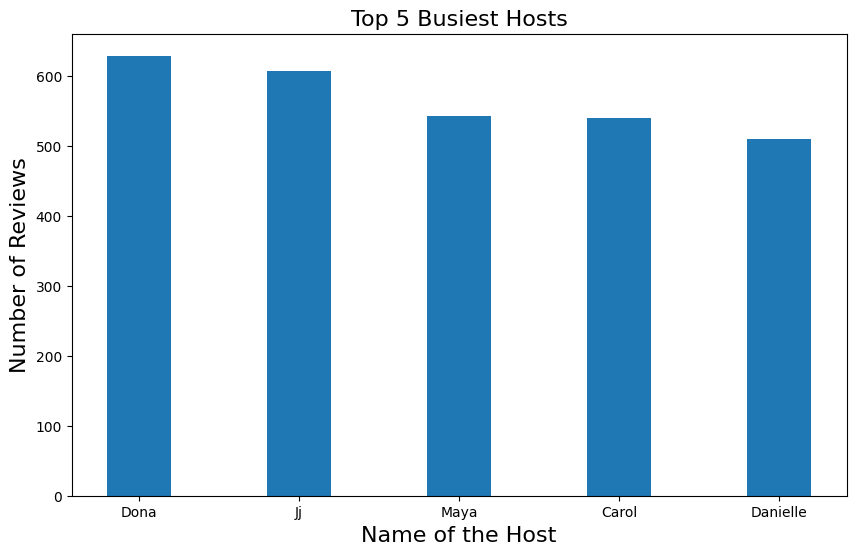

In [ ]:
busiest_hosts = a.groupby(['host_name', 'host_id', 'room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head()
print(busiest_hosts)

# Top most hosts with maximum booking
plt.figure(figsize=(10, 6))
plt.bar(busiest_hosts['host_name'], busiest_hosts['number_of_reviews'], width=0.4)
plt.xlabel("Name of the Host", fontsize=16)
plt.ylabel("Number of Reviews", fontsize=16)
plt.title("Top 5 Busiest Hosts", fontsize=16)
plt.show()


*from the above bar chart we have a top five busiest hosts..*

1-Dona

2-Jj

3-Maya

4-Carol

5-Danielle
#All these hosts has mostly booked rooms are private rooms these thing also be noted

#Maximum bookings in hotelst type with locations

   neighbourhood_group        room_type  minimum_nights
6            Manhattan  Entire home/apt           13199
4             Brooklyn     Private room           10132
3             Brooklyn  Entire home/apt            9559
7            Manhattan     Private room            7982
10              Queens     Private room            3372
9               Queens  Entire home/apt            2096
1                Bronx     Private room             652
8            Manhattan      Shared room             480
5             Brooklyn      Shared room             413
0                Bronx  Entire home/apt             379
11              Queens      Shared room             198
13       Staten Island     Private room             188
12       Staten Island  Entire home/apt             176
2                Bronx      Shared room              60
14       Staten Island      Shared room               9


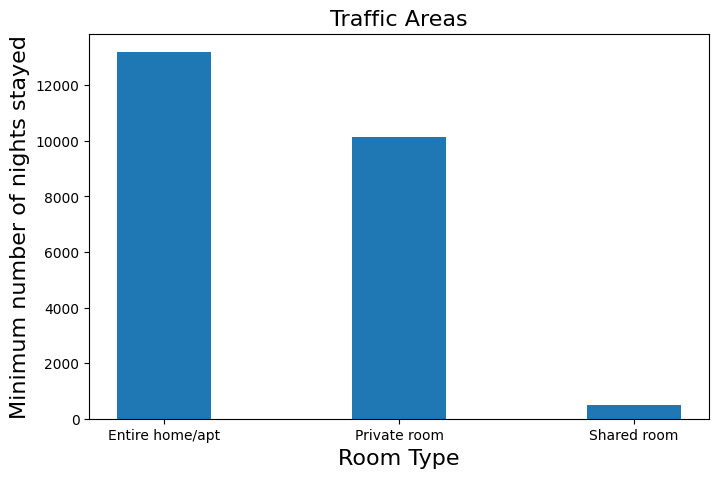

In [ ]:
#maximum bookings in hotelst type with locations
traffic_areas = a.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
print(traffic_areas)
#traffic areas in hotel type
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']
#Visual
fig = plt.figure(figsize = (8,5))
plt.bar(room_type, stayed,width = 0.4)
plt.xlabel("Room Type",fontsize = 16)
plt.ylabel("Minimum number of nights stayed",fontsize = 16)
plt.title("Traffic Areas",fontsize = 16)
plt.show()

From the Above Analysis We can Say that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.

#Total number of different areas and Area with the maximum number of listings

In [ ]:
total_areas = a['neighbourhood'].nunique()
# Find the area with the maximum number of listings
max_listings_area = a['neighbourhood'].value_counts().idxmax()
# Print the results
print("Total number of different areas:", total_areas)
print("Area with the maximum number of listings:", max_listings_area)

Total number of different areas: 221
Area with the maximum number of listings: Williamsburg


Correlation coefficient between number of reviews and price: -0.047954226582662185


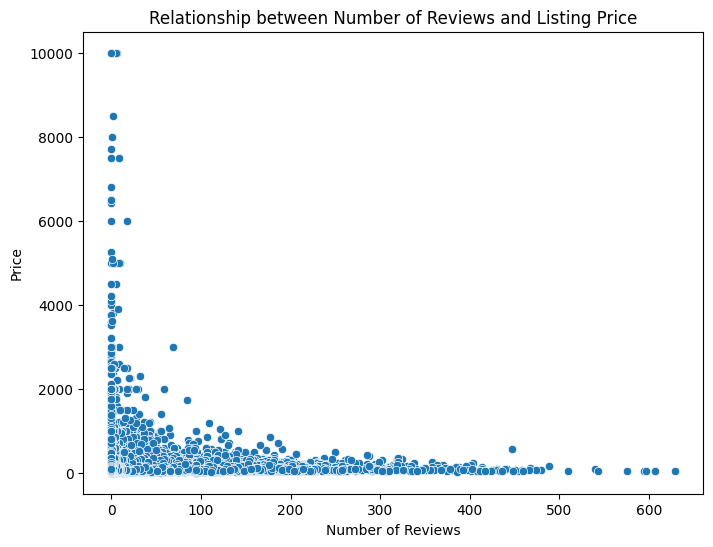

In [ ]:
correlation = a['number_of_reviews'].corr(a['price'])
print("Correlation coefficient between number of reviews and price:", correlation)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=a)
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Relationship between Number of Reviews and Listing Price')
plt.show()

It shows a very weak, practically insignificant negative correlation between them. Therefore, the data indicates little to no meaningful connection between reviews and price.

In [ ]:
grouped_corr = a.groupby('neighbourhood_group')['number_of_reviews', 'price'].corr().iloc[0::2, -1]
print("Correlation coefficients between number of reviews and price for each neighbourhood group:")
print(grouped_corr)


Correlation coefficients between number of reviews and price for each neighbourhood group:
neighbourhood_group                   
Bronx                number_of_reviews   -0.061298
Brooklyn             number_of_reviews   -0.009999
Manhattan            number_of_reviews   -0.060914
Queens               number_of_reviews   -0.041072
Staten Island        number_of_reviews   -0.081421
Name: price, dtype: float64


<ipython-input-76-842c54d2ebc3>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



The correlation coefficients indicate a very weak negative relationship between the number of reviews and price for each neighborhood group in the Airbnb dataset. However, the correlation is negligible in all groups, suggesting that reviews have little impact on listing prices across different neighborhoods.

In [ ]:
import plotly.express as px

fig = px.scatter(a, x='minimum_nights', y='number_of_reviews',
                 labels={'minimum_nights': 'Minimum Nights', 'number_of_reviews': 'Number of Reviews'},
                 title='Relationship between Minimum Nights and Number of Reviews')

# Display the plot
fig.show()


Above Scatter plot shows that most of guest are travelers as they stay for mimimum nights nearly one or two days.

# **Overall Visual**

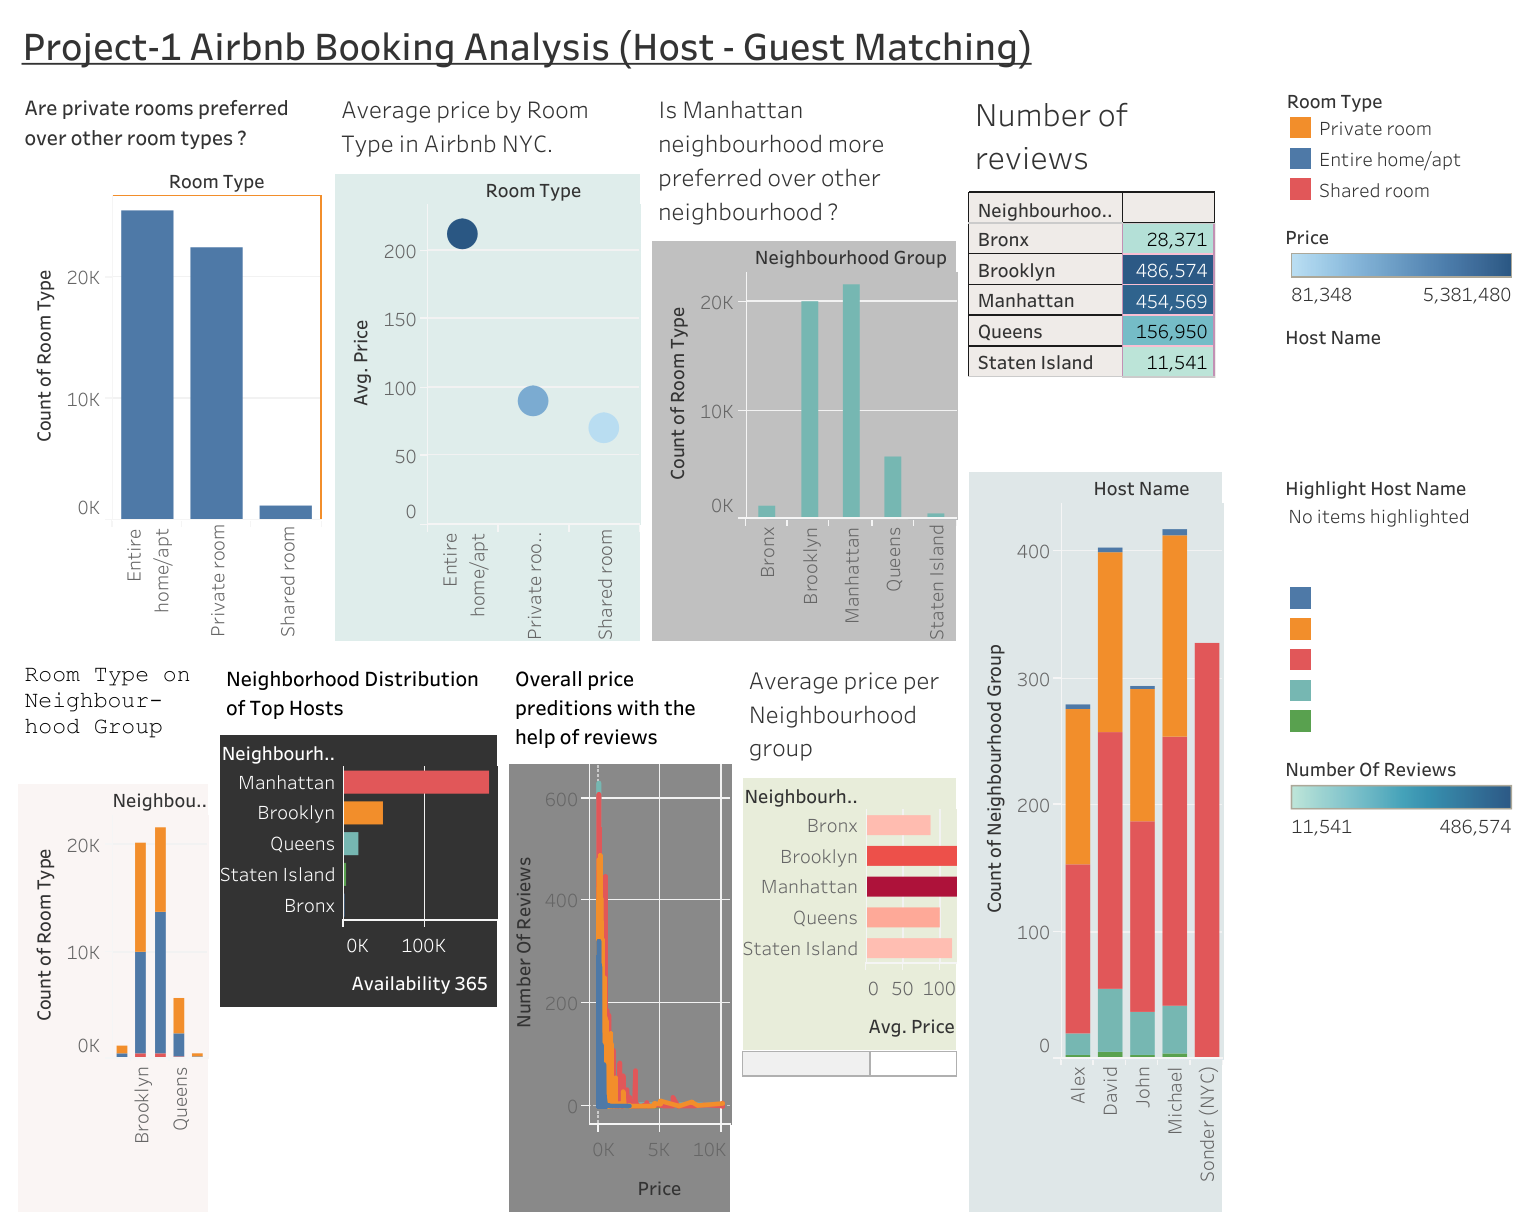

#**Observation:**
1.The most expensive neighborhoods in NYC for Airbnb listings are Manhattan, Brooklyn, and Queens.

2.The most popular room types for Airbnb listings in NYC are entire home/apt and private room.

3.The average price of an Airbnb listing in NYC is $150 per night.

4.The neighborhood in which a listing is located has a significant impact on the price of the listing.

5.The people who prefer to stay in an Entire home or Apartment are going to stay a bit longer in that particular Neighborhood only.

6.The people who prefer to stay in a Private room won't stay longer as compared to a Home or Apartment.

7.Most people prefer to pay less price.

8.If there are more number of reviews for a particular neighborhood group that means that a place is a tourist place and giving good service to the guest.

9.If people are not staying more than one night means they are travelers.

10.For the given data set I found that there are a total of 221 different areas out of which “Williamsburg” has a maximum number of listings.

11.Out of 5 different locations in the dataset, Manhattan is the most crowded location with 44.3% of listings.

12.Top five busiest host are Dona,Jj,Maya,Carol,Danielle

13.Host whose name is Sonder has most number of listing in Manhattan.

14.Many host are doing these thing as business in that the person whose name is Micheal has most number of listing overall on multiple groups.

# Conclusion to the stakeholders
1.The Airbnb market in NYC is highly competitive, with prices varying significantly depending on the neighborhood and room type.

2.Hosts who own multiple listings can expect to command higher prices for their listings.

3.Listings with more reviews tend to attract more guests, so hosts should make sure to respond to reviews promptly and positively.Hosts should actively engage with guests, respond to inquiries and reviews promptly, and provide excellent customer service to enhance the overall guest experience.

4.Listings that are located near popular tourist destinations tend to be more expensive, so hosts should consider this when choosing a location for their listing like Manhattan

May be the most popular Airbnb listings in NYC are those that are centrally located, have good reviews, and offer amenities such as free breakfast and Wi-Fi.

5.At the last I would like to mention that based on all the observation and from these dataset, we should consider the all the important aspect keep in mind like neighbourhood group	,	room type,	price ,		number_of_reviews	.

# **Future Work**
If required we can prepare model which can predict the price with respect to the neighbourhood group and room type.